##  Estudo de caso (Pague Menos): Adidas vs Nike

###### Notebook by : Janathan Junior

Quando se pensa em tênis para viagens, é impossível não considerar a importância de um calçado confortável e de qualidade. Nesse contexto, as marcas que frequentemente vêm à mente são *Adidas* e *Nike*, que dominam o mercado global. O debate entre Adidas e Nike é constante, com ambas as gigantes do setor competindo acirradamente pelo topo, graças à sua enorme capitalização e participação de mercado. Como Especialista em Ciência de Dados , a minha missão nesse desafio será realizar uma análise de dados e nos mostrar quais as informações mais importantes que posso extrar como *insights*, agrupando os produtos para identificar as semelhanças e diferenças nas ofertas dessas duas marcas renomadas.

#### *Objetivo*

Performar uma análise exploratória de dados (EDA) e $\textit{cluster}$ os produros com base em vários fatores


#### *Perguntas Chaves*
>Quais variáveis ​​são mais importantes para $\textit{clustering}$?

>Como cada $\textit{cluster}$ é diferente dos outros?

>Quais são as recomendações de negócios?


#### *Descrição dos dados*
O conjunto de dados consiste em 3.268 produtos da Nike e Adidas, com informações que incluem suas classificações, descontos, preço de venda, preço listado, nome do produto e o número de avaliações.

**Descrição das colunas do conjunto de dados:**

- **Nome do Produto**: Nome do produto
- **ID do Produto**: ID do produto
- **Preço Listado**: Preço listado do produto
- **Preço de Venda**: Preço de venda do produto
- **Desconto**: Percentual de desconto no produto
- **Marca**: Marca do produto
- **Descrição**: Descrição do produto
- **Classificação**: Classificação do produto
- **Avaliações**: Número de avaliações do produto
- **Última Visita**: Última visita ao produto por um cliente



In [1]:
# Importar bibliotecas para ajudar na visualização de dados
import pandas as pd
import os
import kagglehub
import numpy as np

# Para normalizar os dados usando o z-score
from sklearn.preprocessing import StandardScaler

# Bibliotecas para criar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tema para os gráficos (opcional)
# sns.set_theme()

# Remover o limite para o número de colunas exibidas
# pd.set_option("display.max_columns", None)

# Definir o limite para o número de linhas exibidas
# pd.set_option("display.max_rows", 200)

# Para calcular distâncias
from scipy.spatial.distance import cdist

# Para realizar o agrupamento k-means e calcular a pontuação de silhueta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Para visualizar a Curva do Cotovelo e as Pontuações de Silhueta
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# Para suprimir avisos (warnings)
import warnings
warnings.filterwarnings('ignore')


c:\Users\janat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Iniciando download das ultimas versões do dataset disponivel 

In [2]:
# Download latest version
path = kagglehub.dataset_download("kaushiksuresh147/adidas-vs-nike")

print("Path to dataset files:", path)

# Listar arquivos no diretório
files = os.listdir(path)
print("Arquivos no diretório:", files)


# Supondo que haja um arquivo chamado "data.csv" no diretório
csv_file = os.path.join(path, files[0])  ; data = pd.read_csv(csv_file) ## Nome do arquivo 'Adidas Vs Nike.csv' ;

data.head()



Path to dataset files: C:\Users\janat\.cache\kagglehub\datasets\kaushiksuresh147\adidas-vs-nike\versions\1
Arquivos no diretório: ['Adidas Vs Nike.csv']


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [3]:
data.info()  ;print( '\n Shape do arquivo' ,data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB

 Shape do arquivo (3268, 10)


In [4]:
print("Total de dados duplicados são :", data.duplicated().sum())

Total de dados duplicados são : 0


In [5]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.020196,4724.659386,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,26.875765,22.633487,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


#### Limpeza de dados

Criando uma cópia dos dados originais


In [6]:
# Copiando o conjunto de dados para uma variável evitando mudança nos dados originais
df = data.copy()

In [7]:
print(df.shape)

print(f"Sao {df.shape[0]} registros e {df.shape[1]} columas")

(3268, 10)
Sao 3268 registros e 10 columas


##### Dropando colunas 
Vamos deletar colunas como *Product ID*, *Description*, *Last Visited*, pois não tem influência em nossa análise

In [8]:
df.drop("Product ID", axis = 1, inplace = True)
df.drop("Description", axis = 1, inplace = True)
df.drop("Last Visited", axis = 1, inplace = True)

In [9]:
df.head()

,Product Name,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,3.5,72


In [10]:
print(df.shape)

print(f"Sao {df.shape[0]} registros e {df.shape[1]} columas")

(3268, 7)
Sao 3268 registros e 7 columas


In [11]:
df.isnull().sum()


Product Name     0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [12]:
print("O total de duplicados é:", df.duplicated().sum())

O total de duplicados é: 117


In [13]:
df = df[(~df.duplicated())].copy()


In [14]:
print("Total de duplicados são:", df.duplicated().sum())

Total de duplicados são: 0


In [15]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Listing Price,3151.0,7045.960330,4652.089511,0.0,4599.0,5999.0,8999.0,29999.0
Sale Price,3151.0,5983.166931,4173.708897,449.0,2999.0,4599.0,7799.0,36500.0
Discount,3151.0,27.860997,22.442753,0.0,0.0,40.0,50.0,60.0
Rating,3151.0,3.285687,1.371611,0.0,2.6,3.6,4.4,5.0
Reviews,3151.0,41.891146,31.283464,0.0,12.0,40.0,69.0,223.0


*Observações*

- O valor '0' em Listing Price, Discount, Rating, e Reviews pode indicar valores zerados ou nulos
.
- A média Listing Price é 7045.96
- A média Sale Price é 5983.17
- A média Discount é 27.86
- A média Rating é 3.29
- A média Reviews é 41.89

#### Avaliando valores zerados ou Nulos

In [25]:
df.columns = [c.replace(" ", "_") for c in df.columns]
(df["Listing_Price"] == 0).sum()

np.int64(0)

In [ ]:
# Listando os produtos que tem listing price de $0

df[(df["Listing_Price"] == 0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [17]:
df[(df["Listing_Price"] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,336.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
Sale_Price,336.0,11203.050595,4623.825788,1595.0,7995.0,10995.00,13995.0,36500.0
Discount,336.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
Rating,336.0,2.797619,2.150445,0.0,0.0,3.95,4.7,5.0
Reviews,336.0,8.261905,19.708393,0.0,0.0,1.00,6.0,223.0


##### *Observações*

- Estes são 336 dados que têm valores ausentes com *Preço de Listagem* é 0
- Todos os dados com valores ausentes têm *Desconto* de 0


Substituindo o valor do *Listing_Price* ausente pelos dados do *Sale_Price*

In [18]:
df.loc[(df['Listing_Price'] == 0), ['Listing_Price']] = df.loc[(df['Listing_Price'] == 0), ['Sale_Price']].values

In [19]:
df['Listing_Price'].describe()


count     3151.000000
mean      8240.573151
std       4363.018245
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: Listing_Price, dtype: float64

In [20]:
df.isna().sum()


Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

- Os dados de *Preço de Listagem* ausentes agora estão sendo substituídos com sucesso pelo *Preço de Venda*
- Vamos prosseguir com a análise dos dados

### Análise Exploratória de Dados (EDA)

In [21]:
df['Brand'].unique()


array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [24]:
df.groupby('Brand')['Product_Name'].count() # .plot.barh()

Brand
Adidas Adidas ORIGINALS        1
Adidas CORE / NEO           1111
Adidas ORIGINALS             906
Adidas SPORT PERFORMANCE     606
Nike                         527
Name: Product_Name, dtype: int64

In [23]:
df.groupby('Brand')['Sale_Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Adidas Adidas ORIGINALS,1.0,7499.000000,NaN,7499.0,7499.00,7499.0,7499.0,7499.0
Adidas CORE / NEO,1111.0,3116.212421,1311.219510,449.0,2299.00,2799.0,3799.0,7999.0
Adidas ORIGINALS,906.0,6813.900662,3737.011915,2299.0,4324.25,5999.0,7999.0,29999.0
Adidas SPORT PERFORMANCE,606.0,6322.742574,4327.306522,1249.0,2999.00,4899.0,7999.0,27999.0
Nike,527.0,10205.639469,4310.065109,1595.0,7097.00,9995.0,12896.0,36500.0


In [27]:
df.groupby('Brand')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Adidas Adidas ORIGINALS,1.0,4.800000,NaN,4.8,4.8,4.8,4.80,4.8
Adidas CORE / NEO,1111.0,3.412331,1.141266,0.0,2.7,3.5,4.30,5.0
Adidas ORIGINALS,906.0,3.324503,1.185230,0.0,2.6,3.5,4.20,5.0
Adidas SPORT PERFORMANCE,606.0,3.346205,1.150757,0.0,2.6,3.4,4.30,5.0
Nike,527.0,2.879507,2.089835,0.0,0.0,4.0,4.65,5.0


In [28]:
df.groupby('Brand')['Reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Adidas Adidas ORIGINALS,1.0,41.000000,NaN,41.0,41.0,41.0,41.00,41.0
Adidas CORE / NEO,1111.0,48.205221,29.315605,0.0,23.0,48.0,74.00,99.0
Adidas ORIGINALS,906.0,49.330022,28.794036,0.0,25.0,50.0,74.75,99.0
Adidas SPORT PERFORMANCE,606.0,48.853135,28.432025,0.0,23.0,49.0,73.75,99.0
Nike,527.0,7.787476,17.037657,0.0,0.0,2.0,7.00,223.0


In [29]:
# Criar uma função para plotar o Boxplot e o Histograma na mesma escala

def histogram_boxplot(data, feature, figsize = (12,7), kde = False, bins = None):
    """
    Combina tanto o Boxplot quanto o Histograma

    data: DataFrame
    feature: coluna do DataFrame
    figsize: tamanho da figura (padrão = (12,7))
    kde: se deve mostrar a curva de densidade (padrão = False)
    bins: número de bins para o histograma (padrão = None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Número de linhas na grade de subgráficos = 2
        sharex = True,  # O eixo X será compartilhado entre todos os subgráficos
        gridspec_kw = {"height_ratios" : (0.25, 0.75)},  # Define a proporção de altura entre os subgráficos
        figsize = figsize,
    )  # Criando os 2 subgráficos abaixo:

    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "lightcyan",
        medianprops = dict(color = 'gold'),  # Adiciona a Mediana no Boxplot
        meanprops = {"markerfacecolor" : 'darkorange', 'markeredgecolor' : 'darkorange'},  # Adiciona a Média no Boxplot
        flierprops = dict(markerfacecolor = 'red', marker = 'D', markersize = 6),  # Muda a cor dos Outliers para Vermelho
    )  # O Boxplot será criado e o triângulo indicará o valor da Média da coluna

    # Criar o Histograma
    if bins:
        sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins)
    else:
        sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, color = 'mediumslateblue')

    # Adiciona a Média no Histograma
    ax_hist2.axvline(
        data[feature].mean(), color = 'darkorange', linestyle = '--'
    )

    # Adiciona a Mediana no Histograma
    ax_hist2.axvline(
        data[feature].median(), color = 'gold', linestyle = '-'
    )


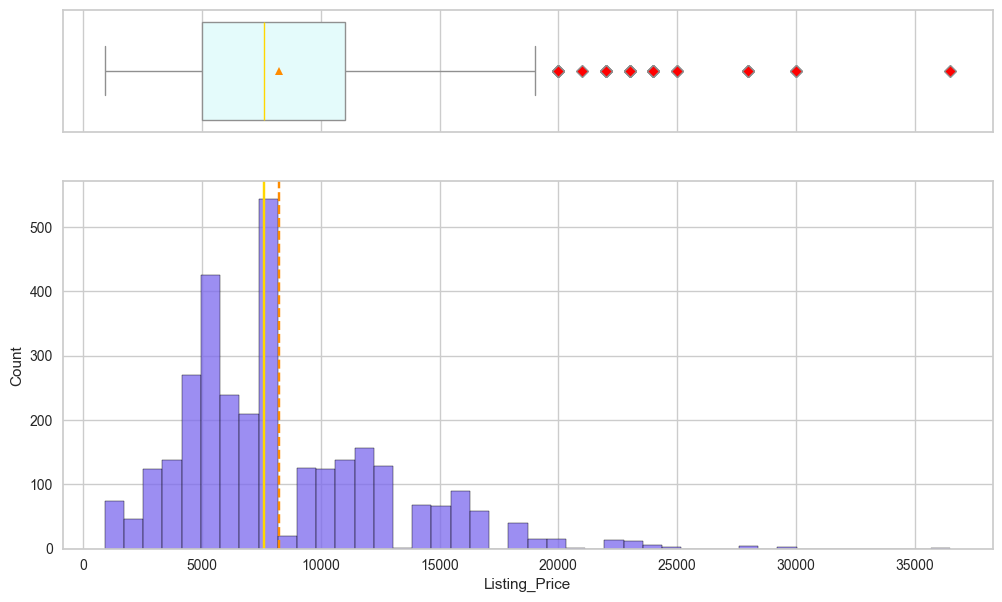

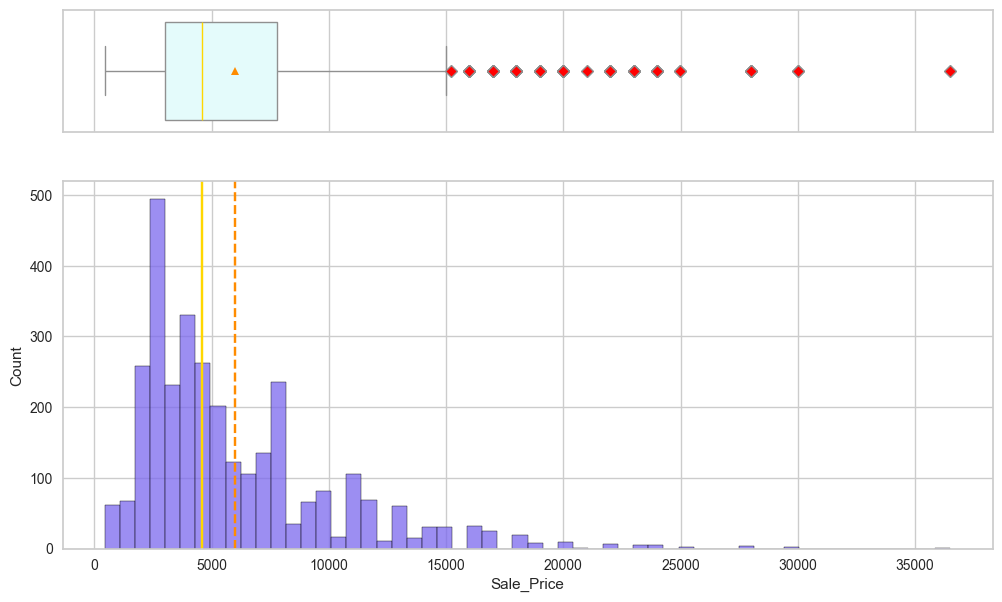

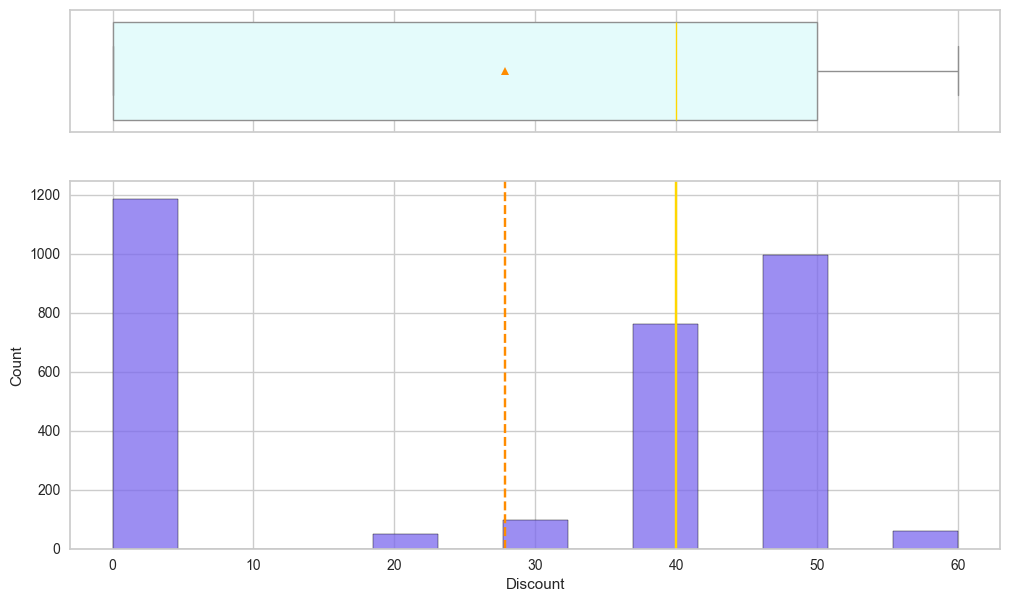

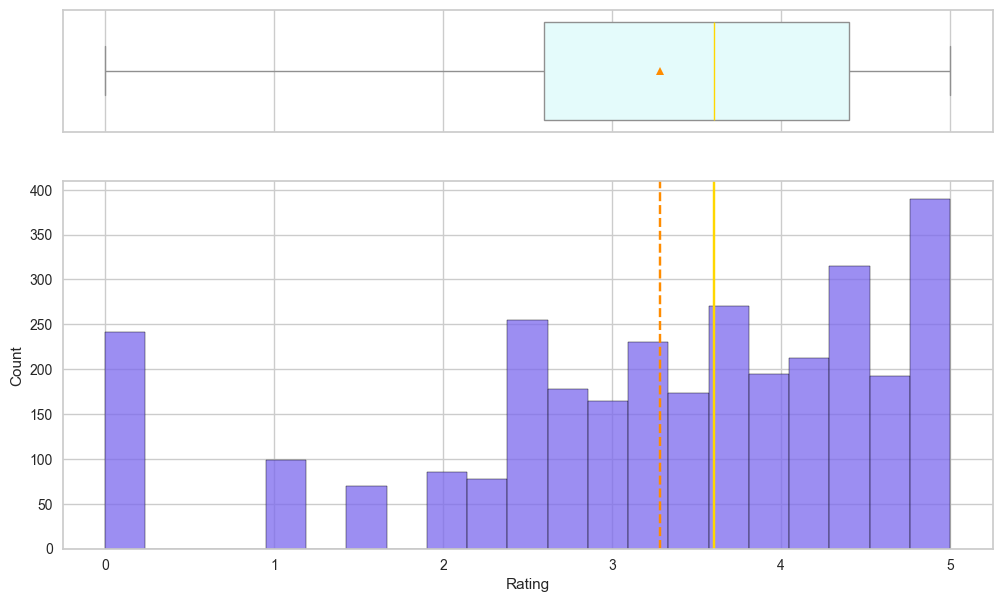

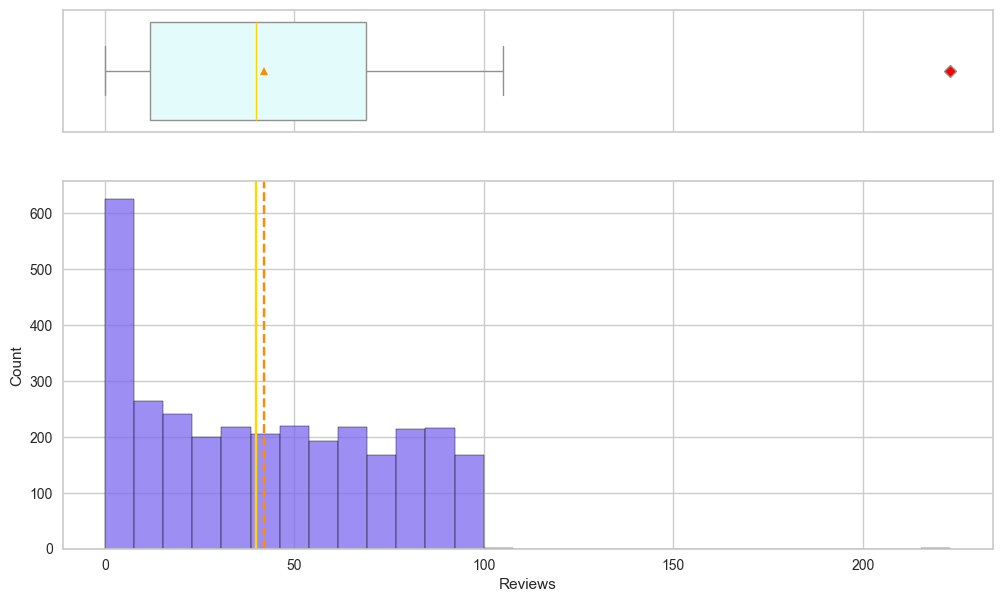

In [30]:
# selecionando apenas dados numéricos
num_col = df.select_dtypes(include = np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)   

- A distribuição de dados para o *Listing_Price* e o *Sales_Price* é distorcida à direita com valores discrepantes superiores, o que significa que a média é maior do que a mediana com a presença de produtos muito caros.

- O maior *Discount* oferecido é 60%, seguido por 50% e 40% (ignorando o desconto de 0%).
- A *Rating* é distorcida entre 2,5-4,5 valores de classificação com mediana acima de 3,5.
- O número de *Reviews* está entre 1 e 100, com distribuição enviesada à direita com um valor discrepante acima de 200.

### Gráfico de plotagem Função de Distribuição Cumulativa Empírica (ECDF)

É uma maneira de representar a distribuição acumulada de dados observados. Ao invés de mostrar a distribuição de uma variável em forma de histograma, a ECDF mostra a probabilidade acumulada de uma variável até cada ponto da amostra.

A ECDF é útil para entender rapidamente a distribuição dos dados e comparar diferentes conjuntos de dados.

- *Eixo X:* Representa os valores observados (dados).
- *Eixo Y:* Representa a fração acumulada de observações até aquele valor, ou seja, a proporção de dados menores ou iguais a cada valor no eixo X.

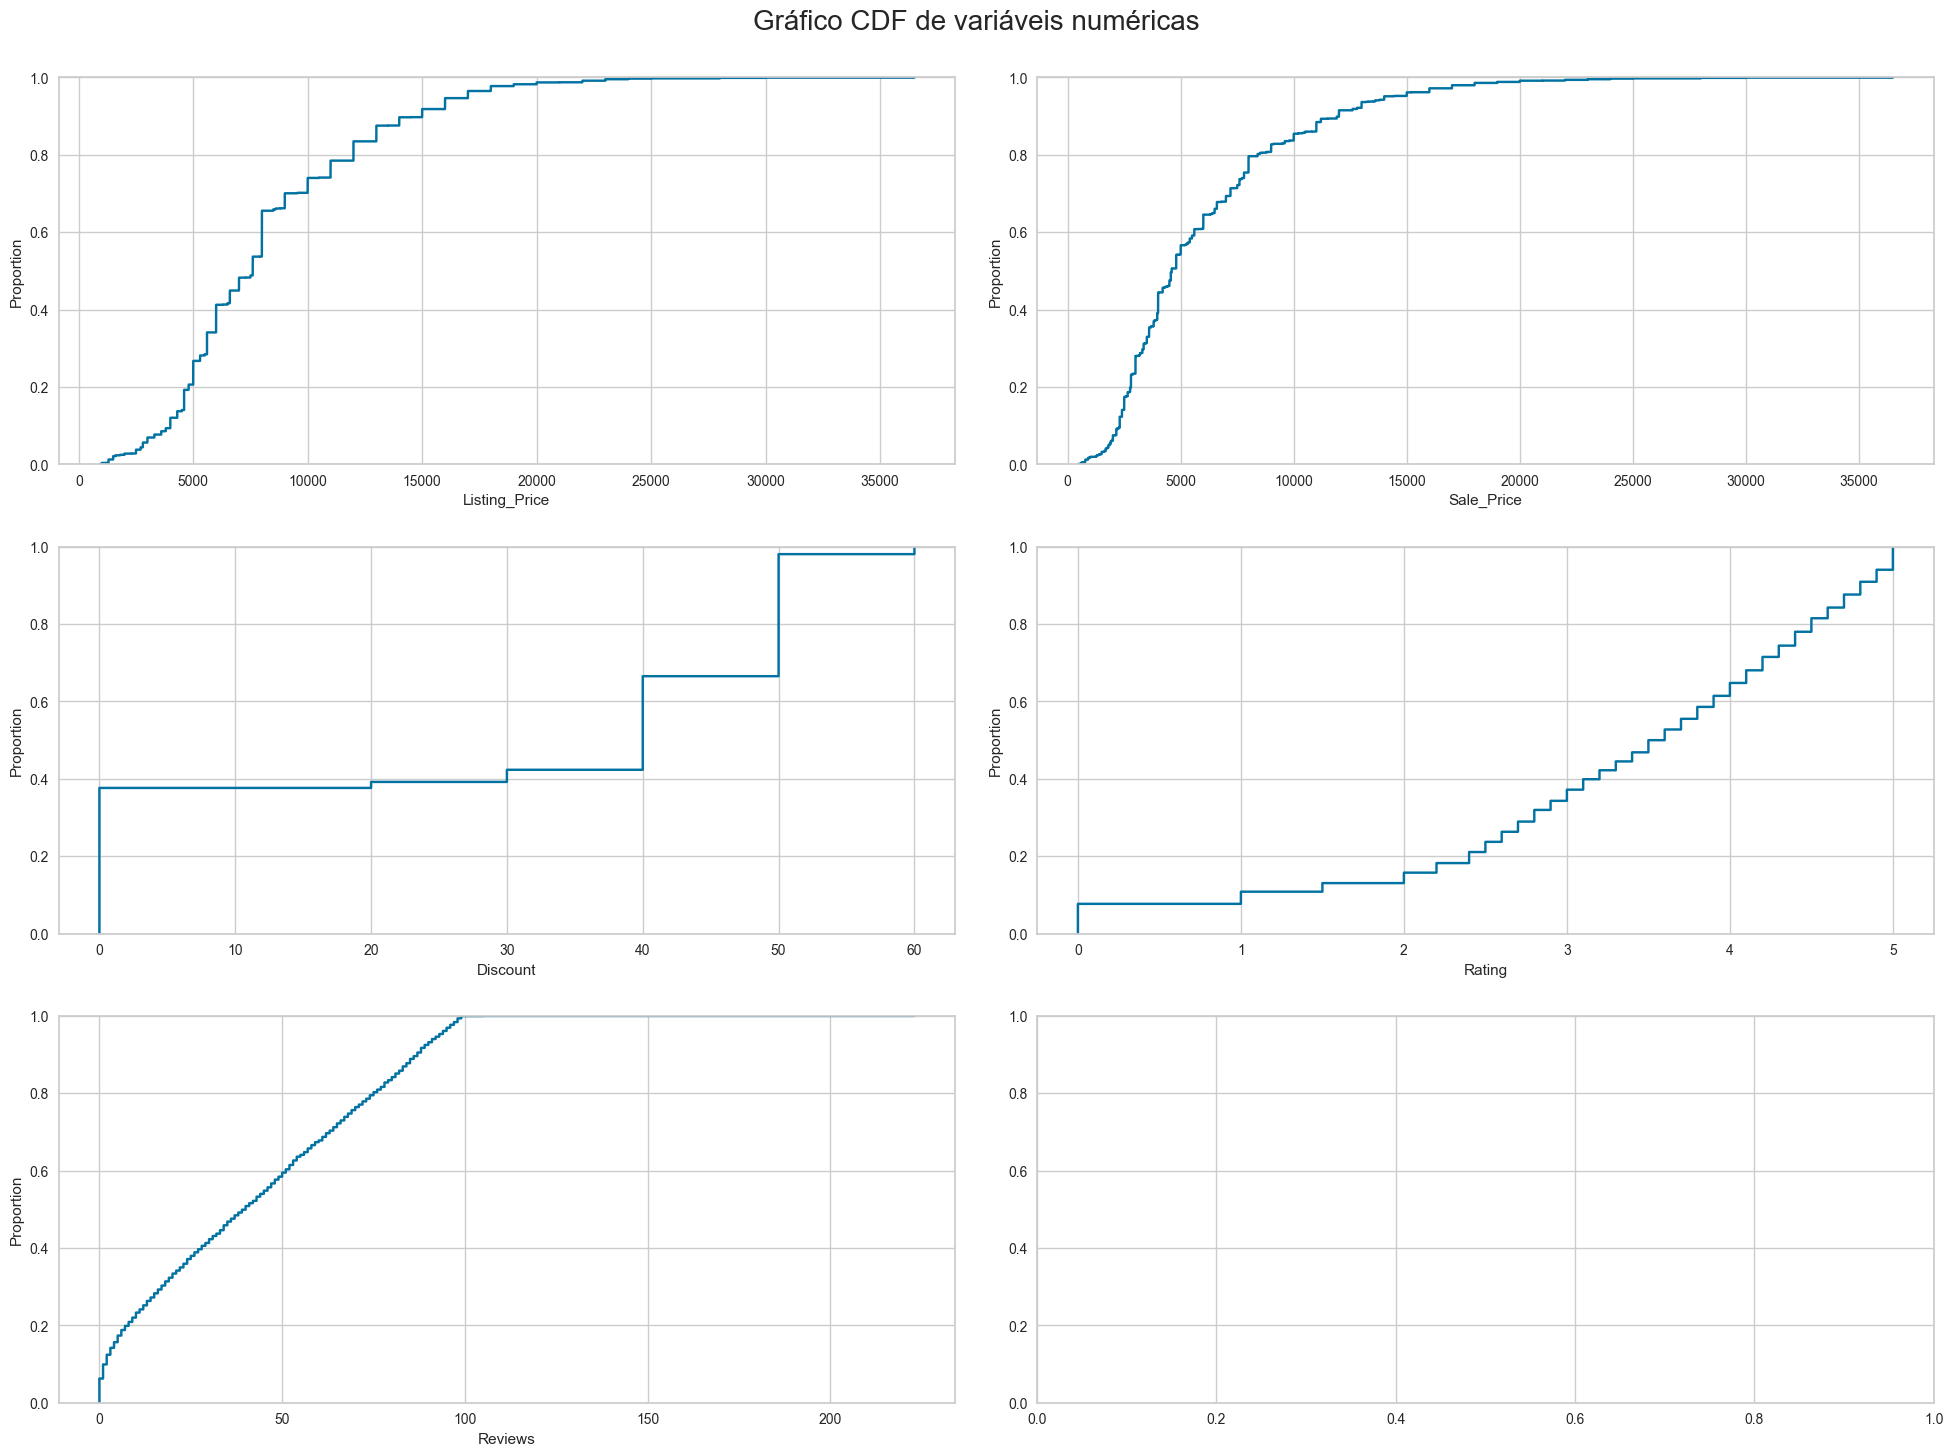

In [31]:
fig, axes = plt.subplots(3, 2, figsize = (20,15))
fig.suptitle("Gráfico CDF de variáveis ​​numéricas", fontsize = 20)
counter = 0

for ii in range(3):
    sns.ecdfplot(ax = axes[ii][0], x = df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax = axes[ii][1], x = df[num_col[counter]])
        counter = counter + 1
    else:
        pass


fig.tight_layout(pad = 2.0)

-  90% dos produtos têm um *Listing_Price* e *Sales_Price* inferior a 15000
- Pelo menos 80% dos produtos têm um *Discount*  50% ou menos
- Pelo menos 50% dos produtos têm uma *Rating* de 3,5 ou menos.
- Quase a maioria dos produtos tem 100 *Reviews* ou menos 

In [32]:
# Função para criar gráficos de barras com rótulos

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Gráfico de barras com porcentagens no topo

    data: DataFrame
    feature: coluna do DataFrame
    perc: exibir porcentagens em vez de contagens (padrão = False)
    n: exibir as n principais categorias (padrão é None, ou seja, exibir todos os níveis)
    """
    
    total = len(data[feature])  # Comprimento da coluna
    count = data[feature].nunique()  # Número de categorias únicas
    if n is None:
        plt.figure(figsize=(count + 3, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='cubehelix_r',
        order=data[feature].value_counts().index[:n],  # Ordena pela frequência
    )

    for p in ax.patches:
        if perc:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # Calcula a porcentagem de cada categoria
        else:
            label = p.get_height()  # Exibe a contagem de cada nível da categoria

        x = p.get_x() + p.get_width() / 2  # Obtém a largura do gráfico
        y = p.get_height()  # Obtém a altura do gráfico

        ax.annotate(
            label,
            (x, y),
            ha="center",  # Alinha o texto horizontalmente ao centro
            va="center",  # Alinha o texto verticalmente ao centro
            size=12,
            xytext=(0, 5),  # Desloca o texto ligeiramente acima
            textcoords="offset points",
        )  # Adiciona o rótulo
    
    plt.show()  # Exibe o gráfico


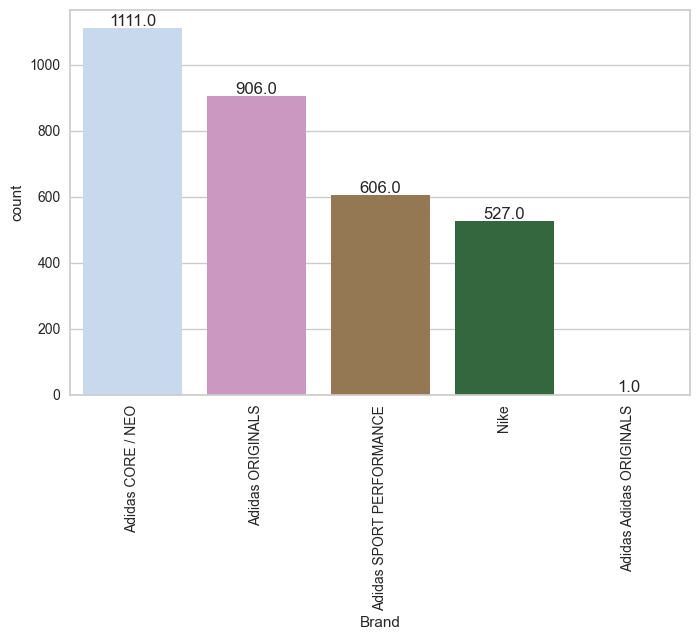

In [33]:
labeled_barplot(df, 'Brand')


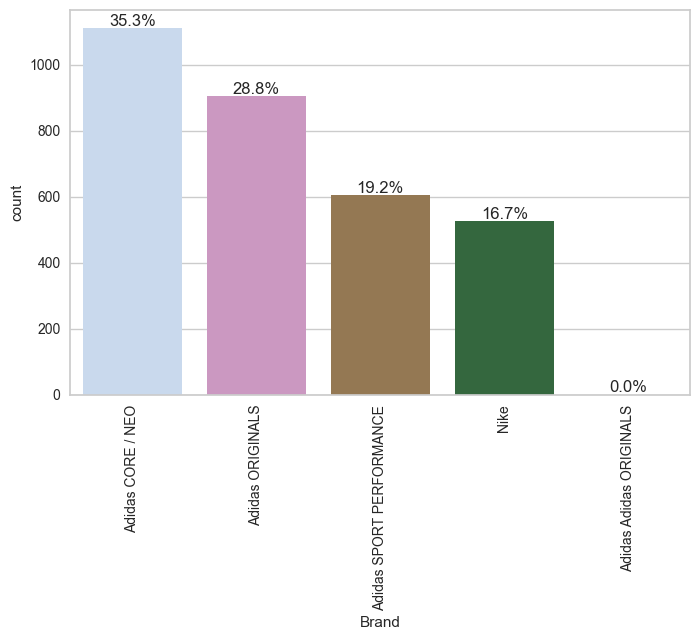

In [34]:
labeled_barplot(df, 'Brand', 'Listing_Price')

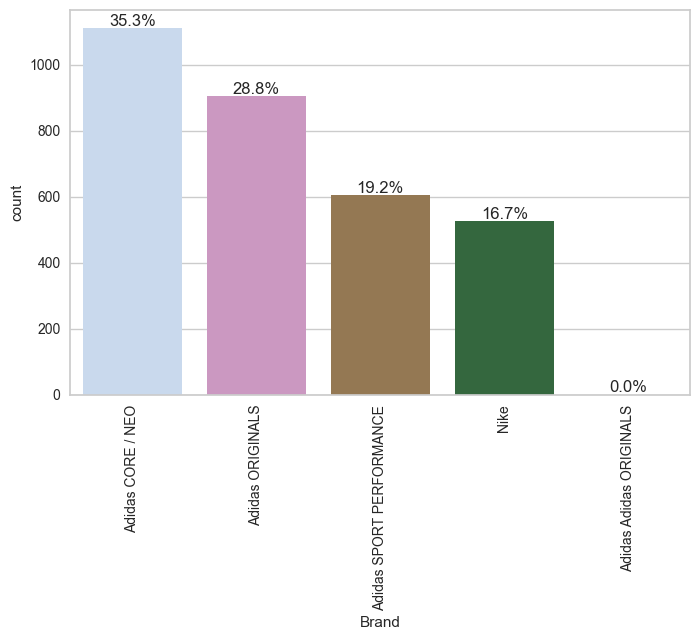

In [35]:
labeled_barplot(df, 'Brand', 'Sale_Price')

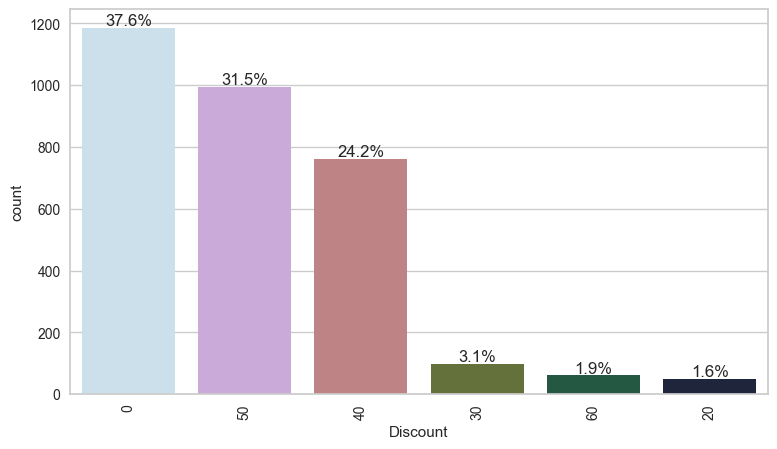

In [36]:
labeled_barplot(df, 'Discount', perc = True)

*Observações*

- Pelo menos 57,6% dos produtos recebidos entre 40%-60% de desconto
- 37,6% dos produtos não tiveram nenhum desconto

### Análise Bivariada

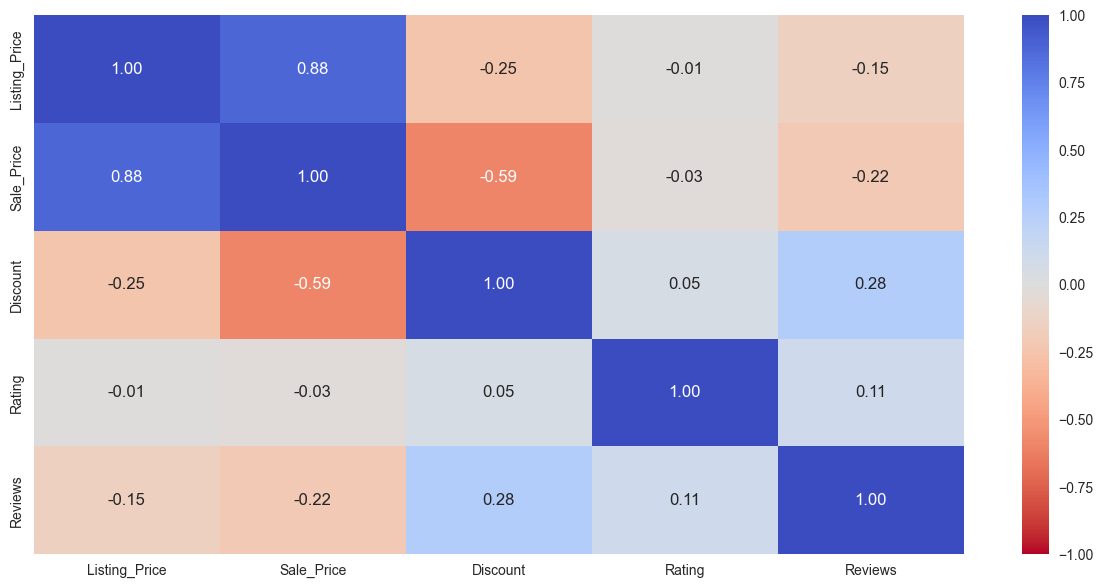

In [37]:
plt.figure(figsize = (15,7))
sns.heatmap(df[num_col].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'coolwarm_r')

plt.show()

- Existe uma alta correlação positiva entre o preço de listagem e o preço de venda - esse comportamento é esperado
- Existe uma baixa correlação negativa entre o desconto e o preço de venda - isso pode indicar que quanto maior o valor do preço de venda, menor o desconto dado

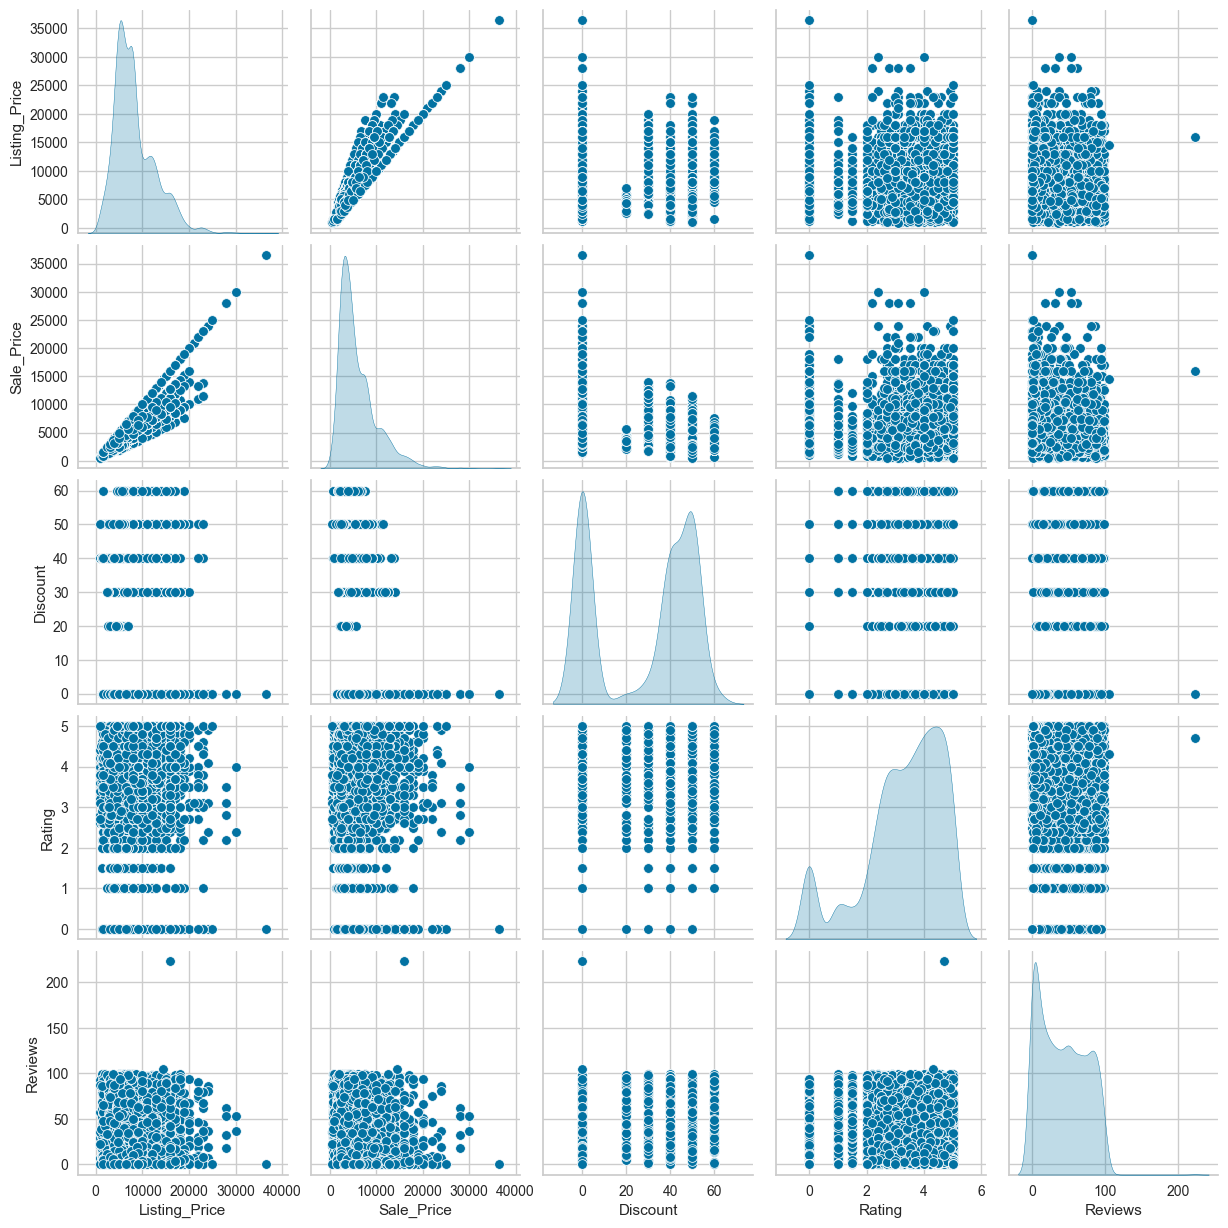

In [38]:
sns.pairplot(data = df[num_col], diag_kind = 'kde')

plt.show()

- A maioria dos produtos cujo preço de listagem é 10000 ou menos recebem 50%-60%
- A maioria dos produtos não tem desconto
- A maioria dos produtos tem 100 ou menos avaliações

### Pré processamentos de Dados

In [39]:
# Check the variable that used for clustering
num_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

In [40]:
# Scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [41]:
# Creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

## K-Means Clustering

  File "c:\Users\janat\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Number of Clusters: 1 	Average Distortion: 2.090721100645825
Number of Clusters: 2 	Average Distortion: 1.7119292934572263
Number of Clusters: 3 	Average Distortion: 1.5555214789269813
Number of Clusters: 4 	Average Distortion: 1.4186109212027933
Number of Clusters: 5 	Average Distortion: 1.308328102417773
Number of Clusters: 6 	Average Distortion: 1.2469497003610273
Number of Clusters: 7 	Average Distortion: 1.1679866300451092
Number of Clusters: 8 	Average Distortion: 1.100953885969816


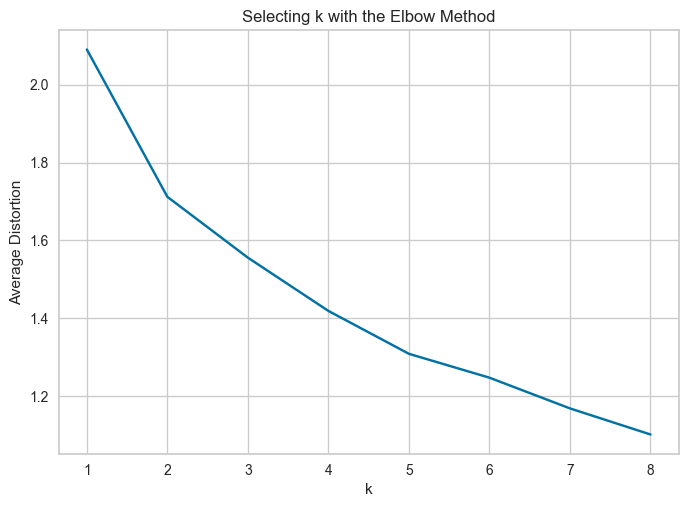

In [42]:
clusters = range(1,9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis = 1)) / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

O valor apropriado para K-Means parece ser 3 ou 4

### Verificando as pontuações da Silhouette

For n_sclusters = 2, the Silhouette Score is 0.33465807658213514
For n_sclusters = 3, the Silhouette Score is 0.2968658403997834
For n_sclusters = 4, the Silhouette Score is 0.21907390381508965
For n_sclusters = 5, the Silhouette Score is 0.27039882323409675
For n_sclusters = 6, the Silhouette Score is 0.26352621535446663
For n_sclusters = 7, the Silhouette Score is 0.28303460254277646
For n_sclusters = 8, the Silhouette Score is 0.2735079951681877
For n_sclusters = 9, the Silhouette Score is 0.28242901874627585


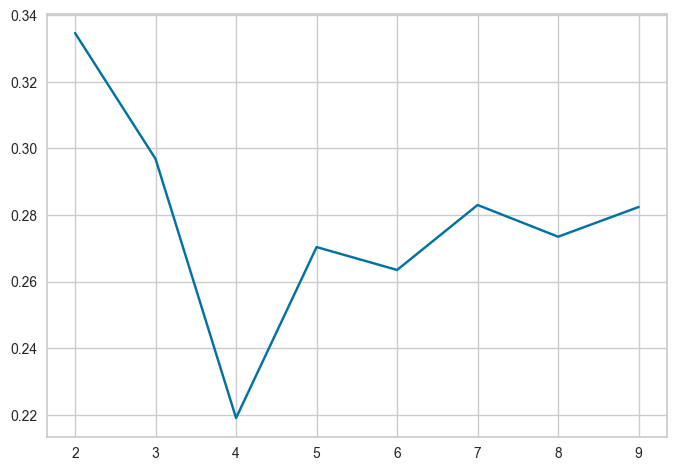

In [43]:
sil_score = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(subset_scaled_df)
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_sclusters = {}, the Silhouette Score is {}".format(n_clusters, score))



plt.plot(cluster_list, sil_score)
plt.show()

*Observações*

- A pontuação Silhouette para 4 é maior que a pontuação Silhouette para 3
- Vamos processar como valor K-Means = 4


Encontrando o número ideal de clusters com coeficientes de *Silhouette*

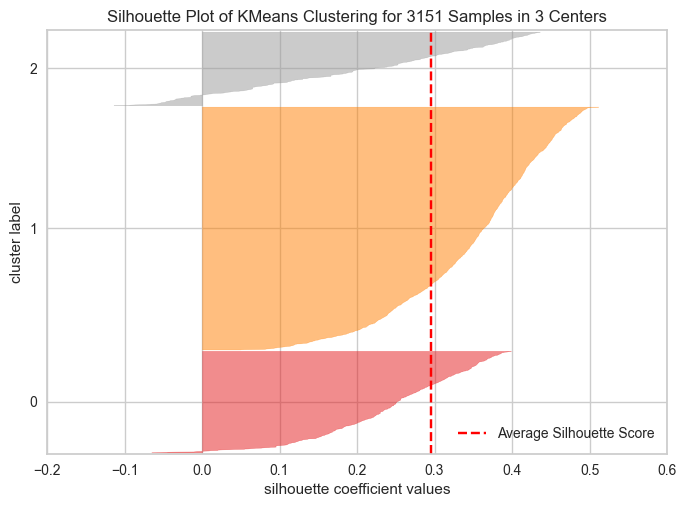

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3151 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)
visualizer.show()

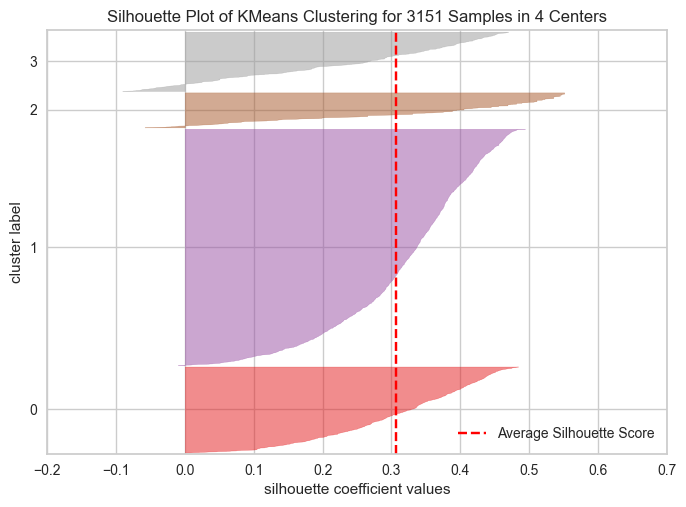

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3151 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)
visualizer.show()

*Observações*

Vamos prosseguir com n_clusters = 4

Criando um modelo *K-Means* com número de clusters = 4

In [46]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

#### Criação de perfil de cluster

In [48]:
# Adding KMeans cluster labels to the original and scaled dataframes
# Adding KMeans cluster labels to the original and scaled dataframes

df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [49]:
cluster_profile = df.groupby("K_means_segments").mean(numeric_only = True)

In [51]:
cluster_profile['count_in_each_segments'] = (
    df.groupby('K_means_segments')['Sale_Price'].count().values
)

In [57]:
# Display the Cluster Profiles

cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,9725.996255,8331.101124,7.715356,0.255805,11.898876,267
1,6629.654600,6275.108597,0.935143,3.800302,39.104072,663
2,6801.853945,3688.562955,45.433688,3.390319,50.137101,1787
3,15711.592166,13540.774194,9.032258,3.932719,30.647465,434


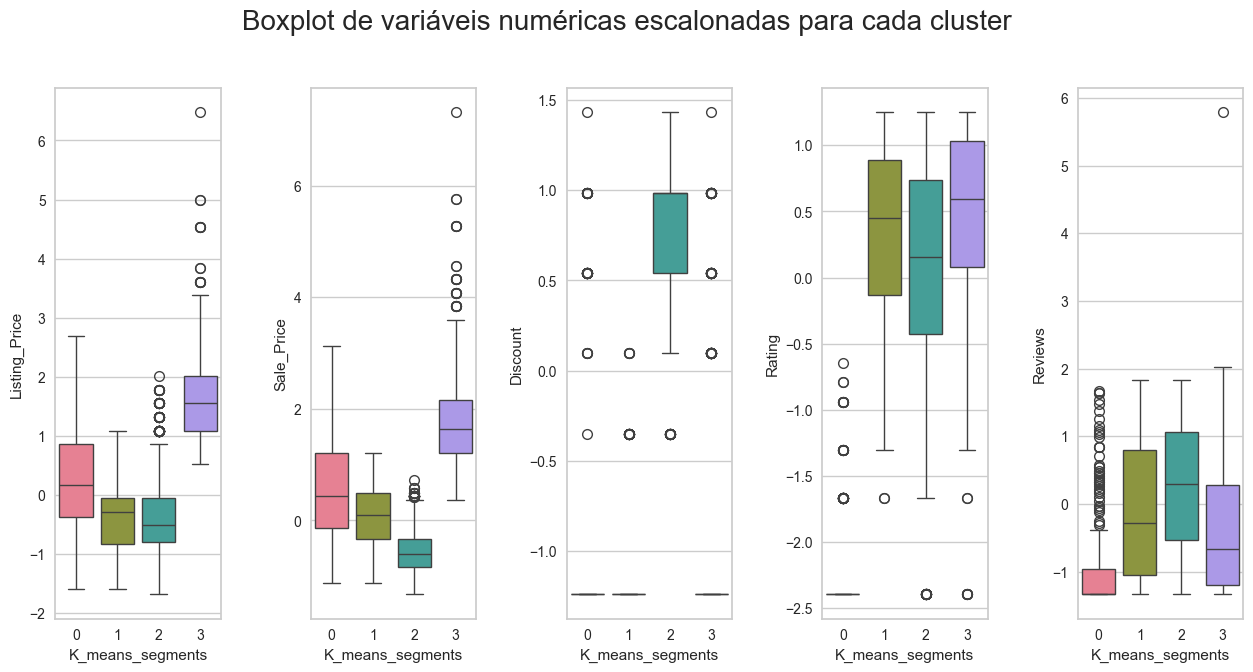

In [67]:
fig, axes = plt.subplots(1, 5, figsize = (13,7))
fig.suptitle('Boxplot de variáveis ​​numéricas escalonadas para cada cluster', fontsize = 20)
counter = 0

for i in range(5):
    sns.boxplot(
        ax = axes[i],
        y = subset_scaled_df[num_col[counter]],
        x = subset_scaled_df['K_means_segments'],
        palette = 'husl',
    )
    counter = counter + 1



fig.tight_layout(pad = 2.0)

### Insights

### Cluster 0
- Este cluster contém produtos premium mais caros, tanto no **Preço de Lista** quanto no **Preço de Venda**, com um preço médio de lista de aproximadamente **15.500**.
- Praticamente **nenhum desconto** é oferecido neste cluster.
- A **mediana da Avaliação** neste cluster indica que os clientes estão muito satisfeitos, com mais de 50% dos produtos obtendo altas avaliações.
- Há **poucas avaliações** registradas para este cluster.

### Cluster 1
- Os **Preços de Lista** e **Preços de Venda** são os **mais baixos** entre os clusters.
- Os produtos neste cluster têm os **maiores descontos** em comparação com outros clusters.
- Mais de 50% dos produtos possuem **altas avaliações**, indicando que estes são os produtos preferidos pelos clientes.
- Em média, há **50 avaliações** para os produtos deste cluster.

### Cluster 2
- Os **Preços de Lista** e **Preços de Venda** são **moderados**.
- Praticamente **nenhum desconto** ou **avaliação** é observado neste cluster.
- As avaliações são as **menores** dentre todos os clusters, o que pode indicar que a **maioria dos clientes está insatisfeita** com os produtos.

### Cluster 3
- Os **Preços de Lista** e **Preços de Venda** são tão **baixos quanto os do Cluster 1**.
- Praticamente **nenhum desconto** é oferecido neste cluster.
- Este cluster possui **altas avaliações e muitas avaliações**, o que sugere que os clientes estão, em geral, **satisfeitos com os produtos**.

#### Comparando entre Cluster vs Marca

In [68]:
pd.crosstab(df.K_means_segments, df.Brand).style.highlight_max(
    color = 'lightgreen', axis = 0
)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,18,53,23,173
1,0,227,166,101,169
2,1,866,564,356,0
3,0,0,123,126,185


#### Observações

- **Adidas** oferece **mais descontos** em seus produtos em comparação com a **Nike**, que raramente concede descontos.  
- Quase **um terço dos produtos da Nike** está na faixa de **preço premium**.

## Recomendações de Negócio

- **Cluster 0**:  
  Consiste em produtos **premium**, por isso campanhas de marketing focadas podem ser realizadas para atingir **clientes com maior poder aquisitivo**.

- **Cluster 1**:  
  Compreende produtos vendidos com **descontos mais elevados**, que podem ser introduzidos em **grande quantidade durante promoções sazonais** (como Natal, Black Friday, Ano Novo, etc.). Essa estratégia pode ser mantida com **alto estoque**.

- **Clusters 2 e 3**:  
  Contêm produtos com **preços baixos e médios**, com quase **nenhum desconto**. Campanhas de marketing **gerais** podem ser realizadas para atingir o **público em geral**.